<a href="https://colab.research.google.com/github/liang-faan/python-ml/blob/main/SML_2_reinforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SML 2**

**Please "Save A Copy" in your google drive and work with your own copy**

### AutoML Tools
Exploratory Phase - Pandas Profiling
Model Selection - PyCaret

In [ ]:
# Install the two packages
# pandas profiling builds a nice report about the dataset
# pycaret is our autoML package
# pyyaml is a problematic package in colab that conflicts with pandas profiling
# so we install a version that will avoid the conflicts
!pip3 install -U ydata-profiling pycaret[full]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Classification models

Let's load the zoo dataset and play with it!

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages that we require
# pathlib is a very useful python package that makes creating and
# working with filepaths easier

import datetime
import pandas as pd
from pathlib import Path
from ydata_profiling import ProfileReport

# Note: The use-case in the previous lesson was regression.
# The objective for today's use-case is classification.
from pycaret.classification import *

# For regression
# from pycaret.regression import *

In [ ]:
# Load the dataset
data_path = Path('/content/drive/MyDrive/pcml_data/5SML/')
filename = 'zoo.csv'

zoo = pd.read_csv(data_path / filename)

In [ ]:
#zoo.head()
zoo[zoo['animal_name']=='frog']

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


### Explore the data using Pandas Profiling

In [ ]:
zoo.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Model Evaluation and Selection

Binary (yes/no) outcome using logistic regression

Our task is to predict whether an animal is a predator or not, using the other characteristics (except animal_name of course).

Note: The linear regression counterpart for classification problem is the logistic regression. However, unlike linear regression, logistic regression do have pretty good predictive powers.

We are going to compare it against the all-powerful ensembles and see how it performs.

First, let's create a working dataset so that if we perform a mistake, we don't need to reload the dataset again.

We need to remove columns that we do not need as well.
and set the dependent (y) variable.

In [ ]:
classification_model = setup(
    data=zoo,
    target='predator',
    ignore_features=['class_type', 'animal_name'],
    numeric_features=['legs'],
    categorical_features=[
        "hair",	"feathers",
        "eggs",	"milk",	"airborne",
        "aquatic",	"toothed",	"backbone",	"breathes",	"venomous",	"fins",
        "tail",	"domestic",	"catsize",
    ]
    # silent=True
)

,Description,Value
0,Session id,1217
1,Target,predator
2,Target type,Binary
3,Original data shape,"(101, 18)"
4,Transformed data shape,"(101, 16)"
5,Transformed train set shape,"(70, 16)"
6,Transformed test set shape,"(31, 16)"
7,Ignore features,2
8,Ordinal features,14
9,Numeric features,1


The exciting part comes next: Comparing models!

We can automatically get compare_models to return the top n models in terms of accuracy. Here, I will use F1.

What is F1? Categorical yes/no problems do not use  MAE, MAD, MAPE, MAPD, RMSE as these are for regression models with continous values.

We discuss the metrics for classification problems in the presentation deck. I paste the formulas below but its more intuitive to remember the logic behind the metrics rather than the formula.


**Accuracy**:  (True Positive + True Negative) / Total

**Precision**: True Positive / (True Positive + False Positive)  

**Recall**: True Positive / (True Positive + False Negative)

**F1 Score**: 2 x [(Precision x Recall) / (Precision + Recall)]

**AUC-ROC**: AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. Good discussion [here](https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152) and [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5).



In [ ]:
# take a look at all the available models in classification
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# compare models
top_models = compare_models(sort='F1', n_select=3)

# compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7429,0.7750,0.8250,0.7417,0.7762,0.4721,0.4866,0.9090
nb,Naive Bayes,0.6857,0.7583,0.9500,0.6836,0.7722,0.2968,0.3442,0.1800
lr,Logistic Regression,0.7143,0.7417,0.8250,0.7238,0.7596,0.4024,0.4199,0.1750
dt,Decision Tree Classifier,0.7571,0.7667,0.7500,0.8150,0.7579,0.5182,0.5409,0.1570
et,Extra Trees Classifier,0.7286,0.7708,0.7417,0.7833,0.7443,0.4484,0.4727,0.6820
lda,Linear Discriminant Analysis,0.6857,0.7125,0.7500,0.7000,0.7187,0.3600,0.3663,0.3670
ridge,Ridge Classifier,0.6714,0.0000,0.7750,0.6750,0.7148,0.3215,0.3262,0.3550
dummy,Dummy Classifier,0.5571,0.5000,1.0000,0.5571,0.7145,0.0000,0.0000,0.1630
ada,Ada Boost Classifier,0.6714,0.7333,0.7500,0.6750,0.7048,0.3321,0.3449,0.2360
gbc,Gradient Boosting Classifier,0.6714,0.7583,0.7250,0.6817,0.6952,0.3394,0.3524,0.2900


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7429,0.7750,0.8250,0.7417,0.7762,0.4721,0.4866,0.909
nb,Naive Bayes,0.6857,0.7583,0.9500,0.6836,0.7722,0.2968,0.3442,0.180
lr,Logistic Regression,0.7143,0.7417,0.8250,0.7238,0.7596,0.4024,0.4199,0.175
dt,Decision Tree Classifier,0.7571,0.7667,0.7500,0.8150,0.7579,0.5182,0.5409,0.157
et,Extra Trees Classifier,0.7286,0.7708,0.7417,0.7833,0.7443,0.4484,0.4727,0.682
lda,Linear Discriminant Analysis,0.6857,0.7125,0.7500,0.7000,0.7187,0.3600,0.3663,0.367
ridge,Ridge Classifier,0.6714,0.0000,0.7750,0.6750,0.7148,0.3215,0.3262,0.355
dummy,Dummy Classifier,0.5571,0.5000,1.0000,0.5571,0.7145,0.0000,0.0000,0.163
ada,Ada Boost Classifier,0.6714,0.7333,0.7500,0.6750,0.7048,0.3321,0.3449,0.236
gbc,Gradient Boosting Classifier,0.6714,0.7583,0.7250,0.6817,0.6952,0.3394,0.3524,0.290


In [ ]:
# take a look at the evaluation metrics
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7f3db156fd30>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7f3db156fe50>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7f3db156ff70>,make_scorer(matthews_corrcoef),pred,{},True,True,False


See what I said about logistic regression?

Next, we want to know what are the importance features that the logistic regression uses, vs a weaker ensemble model.

In [ ]:
# force the plot to show
%matplotlib inline

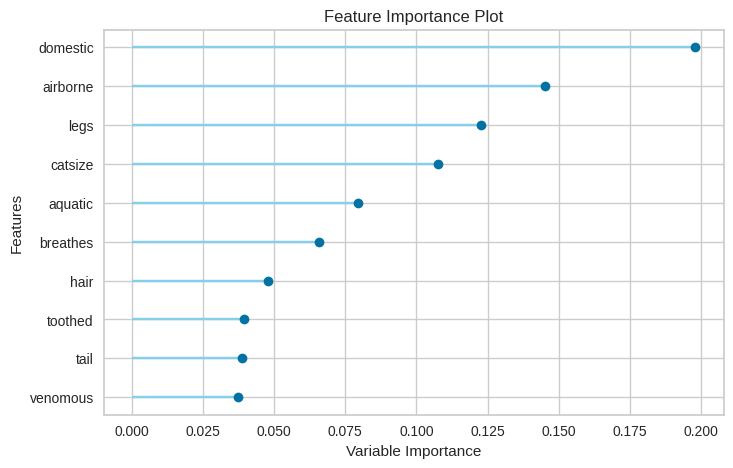

In [ ]:
# plot the feature importance of the top model
plot_model(top_models[0], plot='feature')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.4583,1.0000,0.5714,0.7273,0.0000,0.0000
1,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957,0.7303
2,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957,0.7303
3,0.8571,0.7500,1.0000,0.8000,0.8889,0.6957,0.7303
4,0.8571,0.9167,0.7500,1.0000,0.8571,0.7200,0.7500
5,0.7143,0.7500,0.7500,0.7500,0.7500,0.4167,0.4167
6,0.5714,0.5000,0.7500,0.6000,0.6667,0.0870,0.0913
7,0.4286,0.3333,0.5000,0.5000,0.5000,-0.1667,-0.1667
8,0.5714,0.7083,0.5000,0.6667,0.5714,0.1600,0.1667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

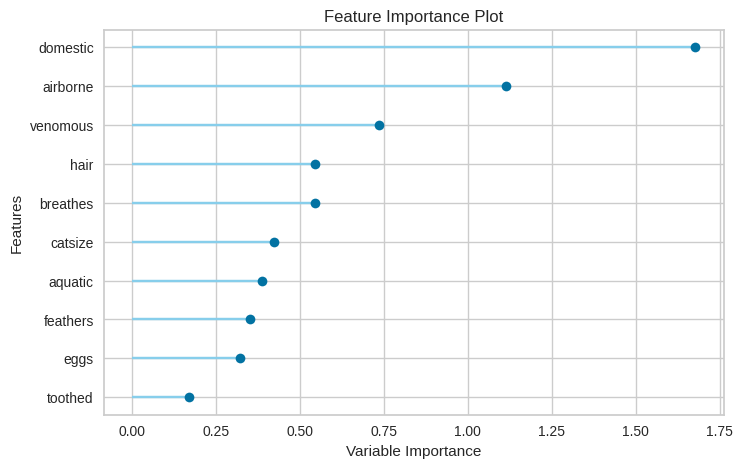

In [ ]:
plot_model(create_model('lr'), plot='feature')

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.4583,1.0000,0.5714,0.7273,0.0000,0.0000
1,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957,0.7303
2,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957,0.7303
3,0.8571,0.7500,1.0000,0.8000,0.8889,0.6957,0.7303
4,0.8571,0.9167,0.7500,1.0000,0.8571,0.7200,0.7500
5,0.7143,0.7500,0.7500,0.7500,0.7500,0.4167,0.4167
6,0.5714,0.5000,0.7500,0.6000,0.6667,0.0870,0.0913
7,0.4286,0.3333,0.5000,0.5000,0.5000,-0.1667,-0.1667
8,0.5714,0.7083,0.5000,0.6667,0.5714,0.1600,0.1667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

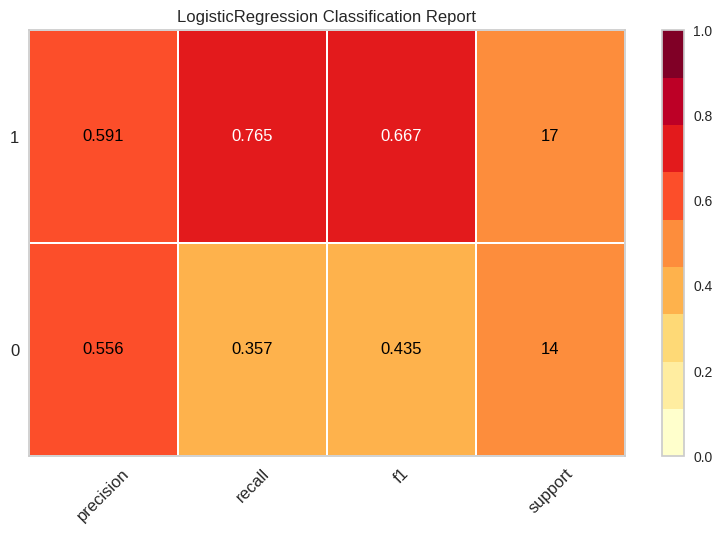

In [ ]:
plot_model(lr, plot='class_report')

### Class Exercise 1: Multi-class labels
What about predicting multi-class labels (no longer 0/1)?

Let's try and predict the class types.

There are 7 class types:
1. Mammal
2. Bird
3. Reptile
4. Fish
5. Amphibian
6. Bug
7. Invertebrate

In [ ]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
multi_class_model = setup(
    data=zoo,
    target='class_type',
    numeric_features=['legs'],
    # silent=True
)

,Description,Value
0,Session id,4340
1,Target,class_type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6"
4,Original data shape,"(101, 18)"
5,Transformed data shape,"(101, 18)"
6,Transformed train set shape,"(70, 18)"
7,Transformed test set shape,"(31, 18)"
8,Numeric features,1
9,Categorical features,1


In [ ]:
# compare models
top_models = compare_models(sort='F1', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7143,0.7500,0.7500,0.7817,0.7377,0.4338,0.4687,0.4550
lr,Logistic Regression,0.6857,0.7333,0.7750,0.7267,0.7362,0.3583,0.3675,1.4200
rf,Random Forest Classifier,0.6857,0.7375,0.7500,0.7600,0.7263,0.3535,0.3786,0.4120
catboost,CatBoost Classifier,0.6714,0.7375,0.7500,0.7267,0.7167,0.3233,0.3405,2.9750
dummy,Dummy Classifier,0.5571,0.5000,1.0000,0.5571,0.7145,0.0000,0.0000,0.2110
et,Extra Trees Classifier,0.7000,0.7083,0.7000,0.7833,0.7139,0.4041,0.4381,0.5510
ridge,Ridge Classifier,0.6714,0.0000,0.7250,0.7433,0.7100,0.3371,0.3556,0.4390
xgboost,Extreme Gradient Boosting,0.6571,0.7292,0.7250,0.7267,0.6977,0.2975,0.3202,0.4040
ada,Ada Boost Classifier,0.6714,0.7042,0.7000,0.7167,0.6925,0.3434,0.3611,0.4810
knn,K Neighbors Classifier,0.6571,0.6917,0.7250,0.7100,0.6885,0.2977,0.3127,0.2650


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.5833,1.0000,0.6000,0.7500,0.4615,0.5477
1,0.7143,1.0000,0.5000,1.0000,0.6667,0.4615,0.5477
2,0.7143,0.7083,0.7500,0.7500,0.7500,0.4167,0.4167
3,0.8571,1.0000,0.7500,1.0000,0.8571,0.7200,0.7500
4,0.7143,0.7917,0.7500,0.7500,0.7500,0.4167,0.4167
5,0.5714,0.7083,0.7500,0.6000,0.6667,0.0870,0.0913
6,0.5714,0.4167,0.7500,0.6000,0.6667,0.0870,0.0913
7,0.4286,0.6250,0.7500,0.5000,0.6000,-0.2727,-0.3536
8,0.7143,0.5417,0.5000,1.0000,0.6667,0.4615,0.5477


Processing:   0%|          | 0/4 [00:00<?, ?it/s]